# 판다스 복습퀴즈


## 문제 1: (resample + def + return + .apply)
- (시나리오: 일별(Daily) 거래 요약 리포트를 만들어야 합니다.)
- df_trans의 'Date' 컬럼을 '인덱스'로 설정하세요. (set_index)
- 'Amount' 컬럼을 'D'(일별) 단위로 '합계(sum)'를 구하세요. (resample 활용) ➡️ daily_summary 변수에 저장
- def를 사용하여, '일별 합계(value)'를 '입구(파라미터)'로 받는 assess_daily_budget 함수를 만드세요.

합계가 400 이상이면 'Over'

합계가 150 이하면 'Save'

그 외는 'Normal'

- daily_summary('일별 합계'가 담긴 Series)에 이 assess_daily_budget 함수를 .apply()하여 'Budget_Status'라는 새 컬럼(Series)을 만드세요.

In [1]:
import pandas as pd
import numpy as np
data = {
    'Date': ['2025-10-01 09:00', '2025-10-01 14:00', '2025-10-02 11:00', '2025-10-03 08:00', '2025-10-03 15:00'],
    'Amount': [100, 50, 200, 300, 150],
    'Category': ['Food', 'Traffic', 'Food', 'Salary', 'Food'],
    'Items': ['Apple,Bread', 'T-money', 'Lunch', 'Bonus', 'Apple,Coffee']
}
df_trans = pd.DataFrame(data)
df_trans['Date'] = pd.to_datetime(df_trans['Date'])

df_trans = df_trans.set_index('Date')
daily_summary = df_trans['Amount'].resample('1d').sum()
def assess_daily_budget(value):
  if value >= 400:
    return "Over"
  elif value <= 150:
    return "Save"
  else:
    return "Normal"
budget_status = daily_summary.apply(assess_daily_budget)
print(budget_status)



Date
2025-10-01      Save
2025-10-02    Normal
2025-10-03      Over
Freq: D, Name: Amount, dtype: object




## 문제 2: (explode + groupby + ['col'])

(시나리오: 'Items' 컬럼에 쉼표(,)로 구분된 여러 항목이 있습니다. '품목별' 평균 가격을 구해야 합니다.)

df_trans의 'Items' 컬럼을 쉼표(,)를 기준으로 쪼개서 '리스트'로 만드세요. (str.split)

'Items' 컬럼을 기준으로 df_trans를 explode시켜서 'df_exploded'라는 새 변수에 저장하세요.

'df_exploded'를 'Item'별로 그룹화(groupby)하여, 'Amount'의평균(mean)을 계산하세요.

In [2]:
import pandas as pd
import numpy as np
data = {
    'Date': ['2025-10-01 09:00', '2025-10-01 14:00', '2025-10-02 11:00', '2025-10-03 08:00', '2025-10-03 15:00'],
    'Amount': [100, 50, 200, 300, 150],
    'Category': ['Food', 'Traffic', 'Food', 'Salary', 'Food'],
    'Items': ['Apple,Bread', 'T-money', 'Lunch', 'Bonus', 'Apple,Coffee']
}
df_trans = pd.DataFrame(data)

df_trans
df_trans['Items'] = df_trans['Items'].str.split(',')
df_exploded = df_trans.explode('Items')
df_exploded.groupby('Items')['Amount'].mean()


,Amount
Items,
Apple,125.0
Bonus,300.0
Bread,100.0
Coffee,150.0
Lunch,200.0
T-money,50.0


## 문제3: (interpolate + | & () 필터링 + .loc)

(시나리오: 센서 데이터의 결측치를 채우고, '위험 신호'를 필터링해야 합니다.)

df_sensor의 'Temp' 컬럼에 있는 결측치(NaN)를 '선형 보간법'으로 채우세요. (interpolate 활용) ➡️ 'Temp_Filled' 새 컬럼으로 저장

'대괄호 필터링'을 사용하여,

'Temp_Filled'가 21.8을 초과(>)했거나(|)

'Pressure'가 100.0 미만(<)인

'위험 신호(row)'를 필터링하세요.

필터링된 결과에서, 'Timestamp'와 'Temp_Filled' 컬럼만 .loc을 사용하여 출력하세요.

In [3]:
import pandas as pd
import numpy as np
data_sensor = {
    'Timestamp': pd.to_datetime(['2025-11-01 00:00', '2025-11-01 01:00', '2025-11-01 02:00', '2025-11-01 03:00', '2025-11-01 04:00']),
    'Temp': [20.5, 21.0, np.nan, 22.0, 22.5],
    'Pressure': [101.2, 101.1, 101.0, 99.9, 100.1]
}
df_sensor = pd.DataFrame(data_sensor)

df_sensor['Temp_Filed'] = df_sensor['Temp'].interpolate()
cond1 = df_sensor['Temp_Filed'] > 21.8
cond2 = df_sensor['Pressure'] < 100
df_sensor = df_sensor[cond1 | cond2]
df_sensor.loc[:, ['Timestamp', 'Temp_Filed']]


,Timestamp,Temp_Filed
3,2025-11-01 03:00:00,22.0
4,2025-11-01 04:00:00,22.5


## 문제4
- 모든 나이(age)에 1을 더하시오
- 20대의 'views' 평균과 30대의 'views'평균의 절댓값 차이를 구하시오. (반올림 후 소수 둘째자리까지 계산)

In [4]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p1/type1_data1.csv")

#df.head()
df['age'] = df['age'] + 1
#df.head()
df_group1 = df.query('age >= 20 and age < 30')
df_group2 = df.query('age >= 30 and age < 40')
#df_group1.head()
print(round(abs(df_group1['views'].mean() - df_group2['views'].mean()),2))


263.13


## 문제5
- 'subscribed'칼럼이 2024년 2월인 데이터를 찾으시오
- 위에서 찾은 데이터 중 'f3'컬럼이 gold 인 데이터를 구하시오

In [5]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p1/type1_data1.csv")

#df.head()
#df.info()
df = df.query('subscribed.str.startswith("2024-02") and f3 == "gold"')
print(len(df))

5


## 문제6
- 'views'컬럼 값이 1000 이하인 데이터(결측치 제외)를 찾으시오
- 앞에서 구한 데이터 중 'f4' 컬럼의 최빈값을 찾으시오.

In [6]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p1/type1_data1.csv")

#df.head()
df['views'] = df['views'].dropna()
df = df.query('views <= 1000')
print(df['f4'].mode()[0])

ISFJ


## 문제7

- 결측치가 있는 행을 삭제하시오.
- 결측치가 삭제된 데이터를 사용하여 지역별(city) 평균을 계산하시오.
- 앞에서 계산한 지역별 평균 데이터에서 'f2' 컬럼 값이 가장 큰 지역을 구하시오.

In [7]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p1/type1_data1.csv")

df = df.dropna()
df = df.groupby(['city']).mean(numeric_only = True)
df = df.sort_values('f2', ascending = False)
print(df.index[0])

서울


## 문제8

- 데이터에서 결측치가 있는 데이터(행)를 모두 제거하시오.
- 결측치가 제거된 데이터를 사용하여 앞에서부터 70% 데이터를 구하시오. (단, 데이터 70%지점의 index가 소수점으로 계산될 경우 소수점 이하는 버림)
- 앞에서 구한 70% 데이터 중 ‘views’ 컬럼의 3사분위수에서 1사분위수를 뺀 값을 정수로 구하시오.

In [8]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p1/type1_data1.csv")

df = df.dropna()
#df.shape
seventy = int(len(df)*0.7)
df = df.iloc[:seventy]
#df.shape
print(int(df['views'].quantile(.75) - df['views'].quantile(.25)))

2771


## 문제9

- 결측치가 가장 많은 두 컬럼을 찾으시오.
- 첫 번째로 결측치가 많은 컬럼에서 결측치가 있는 데이터(행)를 삭제하시오.
- 두 번째로 결측치가 많은 컬럼을 최빈값으로 대체하시오.
- ‘f3’ 컬럼의 ‘gold’ 값을 가진 데이터의 수를 정수형으로 구하시오.

In [9]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p1/type1_data1.csv")

#print(df.isnull().sum())
df = df.dropna(subset=['f1'])
df['f3'] = df['f3'].fillna(df['f3'].mode()[0])
df = df.query('f3 == "gold"')
print(int(len(df)))

63


# 시각화 복습퀴즈

## 문제1: (Pandas: pivot_table + Seaborn: heatmap)

(시나리오: '요일'과 '시간대(time)'별 '평균 팁(tip)'이 어떻게 다른지 '히트맵'으로 보고 싶습니다.)

(판다스 복습) df_tips 데이터를 사용해 'index'는 'day', 'columns'는 'time'으로 하고, 'values'는 'tip'의 'mean'(평균)으로 하는 '피벗 테이블(pivot_table)'
을 pivot_data라는 변수에 만드세요.

(시각화) sns.heatmap을 사용하여 이 pivot_data를 시각화하세요.

(옵션) '숫자'를 표시하고, '색상'은 'coolwarm'으로 설정해 보세요.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/tmp/ipython-input-3509296376.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = df_tips.pivot_table(index = 'day', columns = 'time', values='tip', aggfunc='mean')


<Axes: xlabel='time', ylabel='day'>

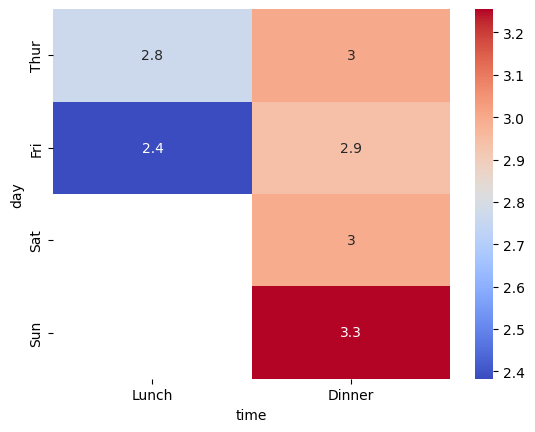

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_tips = sns.load_dataset('tips')
display(df_tips.head())

pivot_data = df_tips.pivot_table(index = 'day', columns = 'time', values='tip', aggfunc='mean')
fig, ax = plt.subplots()
sns.heatmap(pivot_data, ax=ax, annot=True, cmap='coolwarm')


## 문제2:  (Pandas: def/apply + Seaborn: FacetGrid)

(시나리오: '성별(sex)'에 따라 '팁(tip)'을 많이 내는 기준이 다른지, '요일(day)'별로 나눠보고 싶습니다.)

def를 사용하여, 'tip'을 '입구(value)'로 받는 flag_high_tip 함수를 만드세요.

팁이 5달러 초과면 'High_Tip', 아니면 'Normal_Tip'을 '반환(return)'하세요.

(판다스 복습) df_tips의 'tip' 컬럼에 이 함수를 .apply()하여 'Tip_Flag'라는 새 컬럼을 만드세요.

(시각화) sns.FacetGrid를 사용하여, 'day'(요일)별로 '컬럼(col)'을 나누세요.

g.map_dataframe을 사용하여, 각 'ax'에 sns.histplot (히스토그램)을 그리세요.

x축은 'tip', 'Tip_Flag'에 따라 색(hue)을 구분하세요.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


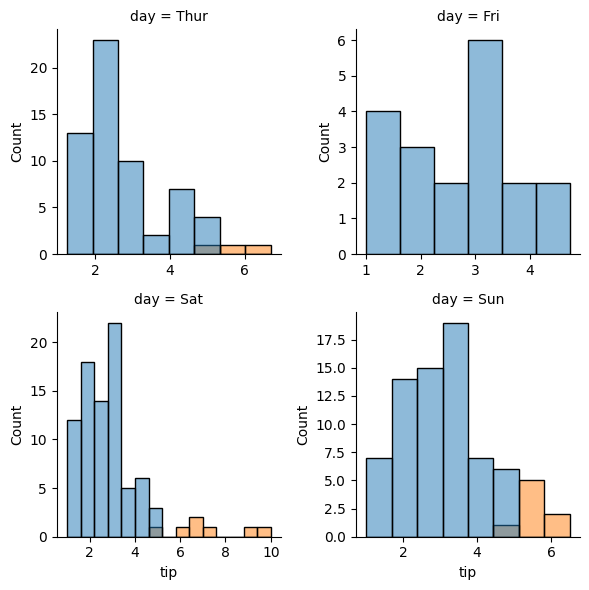

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_tips = sns.load_dataset('tips')
display(df_tips.head())

def flag_high_tip(value):
  if value > 5:
    return 'High_Tip'
  else:
    return "Normal_Tip"
df_tips['Tip_Flag'] = df_tips['tip'].apply(flag_high_tip)
g = sns.FacetGrid(data=df_tips, col='day', col_wrap=2, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, data=df_tips, x='tip', hue='Tip_Flag')


문제 3: (Pandas: query + Plotly: px.histogram + facet_col)
(시나리오: 'Plotly'를 사용해, '비흡연자(Non-Smoker)'들만 따로 뽑아서, '요일(day)'별로 'total_bill'의 '분포(histogram)'를 비교하고 싶습니다.)

.query() 메서드를 사용하여, 'smoker' 컬럼이 'No'인 데이터만 필터링하여 df_non_smokers라는 새 변수에 저장하세요.

(시각화) plotly.express (px)를 사용하여 px.histogram을 그리세요.

'데이터'는 df_non_smokers

x축은 'total_bill'

'day'(요일)별로 '컬럼을 나누세요' (facet_col='day')

'성별(sex)'에 따라 '색(color)'을 구분하세요.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df_tips = sns.load_dataset('tips')
display(df_tips.head())

df_non_smokers = df_tips.query('smoker == "No"')
fig = px.histogram(data_frame=df_non_smokers, x='total_bill', facet_col='day', color='sex')
fig.show()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
